Griffin Shelor\
28-3-2024

# Homework 6: Working with Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Q1. Read the csv file 'homework6_movies.csv' into a `pandas` `DataFrame`. Display the column names - just the column names - don't use `.head()`.

In [2]:
## reading in data
movies = pd.read_csv('homework6_movies.csv')
## displaying column names
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

### Q2. Make a `DataFrame` that contains just the columns 'title', 'genres','budget', 'revenue', 'vote_average', 'release_date'. Print the shape of this dataframe, and display the first 5 rows. 

If you decide to give this `DataFrame` a new name then use `.copy()` when generating it (otherwise you may get pink warning messages when you do some of the later questions).

In [3]:
## subsetting by specific columns
movies_new = movies[["title", "genres", "budget", "revenue", "vote_average", "release_date"]].copy()

## printing first 5 rows
movies_new.head()

,title,genres,budget,revenue,vote_average,release_date
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000,2787965087,7.2,2009-12-10
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000,961000000,6.9,2007-05-19
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000,880674609,6.3,2015-10-26
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000,1084939099,7.6,2012-07-16
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000,284139100,6.1,2012-03-07


### Q3. Use `.replace()` to change all the revenue values of `0` to `np.NaN`. Next, drop all `NaN` values from the `DataFrame` and reset the row indices. Finally, use `info()` to check that all `NaN` values have been removed.


**Important Note:** Make sure that the indices are properly reset as you will be working with this `DataFrame` for the rest of the homework.

[Aside: Depending on how you use the function `dropna()` you may see pink warning messages. This is because `dropna()` returns a view and not a copy of the data, and thus changes to the view are frowned upon. Don't sweat this detail for our notebook today.]

In [4]:
# replacing 0 with NaN
movies_new["revenue"] = movies_new["revenue"].replace(0, np.NaN)

# drop rows with NAs, resetting indices
clean_movies = movies_new.dropna()
clean_movies.reset_index(drop=True, inplace=True)
# printing info
clean_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3376 non-null   object 
 1   genres        3376 non-null   object 
 2   budget        3376 non-null   int64  
 3   revenue       3376 non-null   float64
 4   vote_average  3376 non-null   float64
 5   release_date  3376 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 158.4+ KB


### Q4. Add a 'year' column to your new `DataFrame` making sure it is of type 'int'. Delete the 'release_date' column. Display the first 5 rows of after these changes.
* The year (as a string) can be extracted from the first 4 characters of 'release_date'
* Consider using list comprehension or the `.str.slice()` function defined in `pandas`

In [5]:
## adding year column
clean_movies['year'] = clean_movies['release_date'].str.slice(stop = 4).astype(int)
## dropping release_date column
clean_movies = clean_movies.drop(['release_date'], axis = 1)

## displaying first 5 rows
clean_movies.head()

/var/folders/mn/cz5gy25n1yg1r_ksn1lp_81r0000gn/T/ipykernel_27825/2416807183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_movies['year'] = clean_movies['release_date'].str.slice(stop = 4).astype(int)


,title,genres,budget,revenue,vote_average,year
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000,2.787965e+09,7.2,2009
1,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000,9.610000e+08,6.9,2007
2,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000,8.806746e+08,6.3,2015
3,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000,1.084939e+09,7.6,2012
4,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000,2.841391e+08,6.1,2012


### Q5. Plot 'year' vs 'budget' using a scatter plot (i.e. with markers and not lines). Using different colored markers, plot the median budget in each year on top of the full scatter plot.

Hint: Consider using `groupby` with the 'year' column to get the median values for the plot.

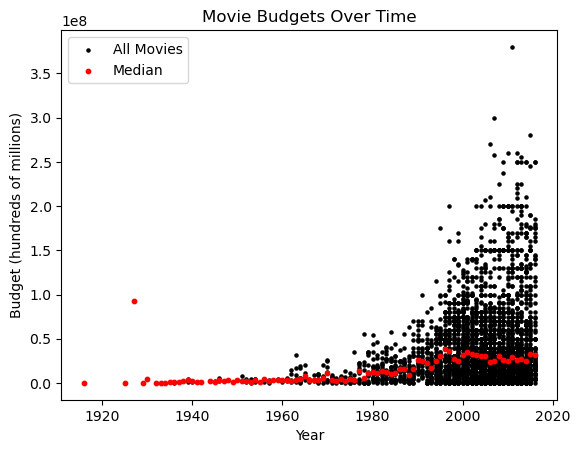

In [6]:
## grouping movies by year
movies_grp = clean_movies.groupby("year")

## Plot movie budgets by year
plt.scatter(clean_movies["year"], clean_movies["budget"], s = 5, c = 'black', label = "All Movies")
plt.scatter(movies_grp['year'].unique(), movies_grp['budget'].median(), s = 10, c = 'red', label = "Median")
plt.xlabel('Year')
plt.ylabel('Budget (hundreds of millions)')
plt.title('Movie Budgets Over Time')
plt.legend(loc = 'best');

### Q6. Add a 'profit' column ('revenue' minus 'budget') to your `DataFrame`. After doing this, make a new `DataFrame` (a copy) and sort by 'profit'. Display the 5 movies with the highest profit in one cell and display the 5 movies that lost the most money in a second cell.

In [7]:
## creating profit column
clean_movies['profit'] = clean_movies['revenue'] - clean_movies['budget']

## making new dataframe
movie_profit = clean_movies.copy()

## sorting by descending profit
movie_profit_sort = movie_profit.sort_values(by=["profit"], ascending = False)
## displaying top 5 movies by profit
movie_profit_sort.head(5)

,title,genres,budget,revenue,vote_average,year,profit
0,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000,2.787965e+09,7.2,2009,2.550965e+09
25,Titanic,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",200000000,1.845034e+09,7.5,1997,1.645034e+09
28,Jurassic World,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150000000,1.513529e+09,6.5,2015,1.363529e+09
44,Furious 7,"[{""id"": 28, ""name"": ""Action""}]",190000000,1.506249e+09,7.3,2015,1.316249e+09
16,The Avengers,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",220000000,1.519558e+09,7.4,2012,1.299558e+09


In [8]:
## sorting by ascending profit
movie_profit_descsort = movie_profit.sort_values(by=["profit"])
## displaying bottom 5 movies by profit
movie_profit_descsort.head(5)

,title,genres,budget,revenue,vote_average,year,profit
13,The Lone Ranger,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",255000000,89289910.0,5.9,2013,-165710090.0
334,The Alamo,"[{""id"": 37, ""name"": ""Western""}, {""id"": 36, ""na...",145000000,25819961.0,5.8,2004,-119180039.0
139,Mars Needs Moms,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",150000000,38992758.0,5.5,2011,-111007242.0
206,The 13th Warrior,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",160000000,61698899.0,6.4,1999,-98301101.0
307,The Adventures of Pluto Nash,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",100000000,7103973.0,4.4,2002,-92896027.0


### Q7. Make a scatter plot of 'vote_average' on the x-axis and 'profit' on the y-axis. Make sure your axes are labeled.

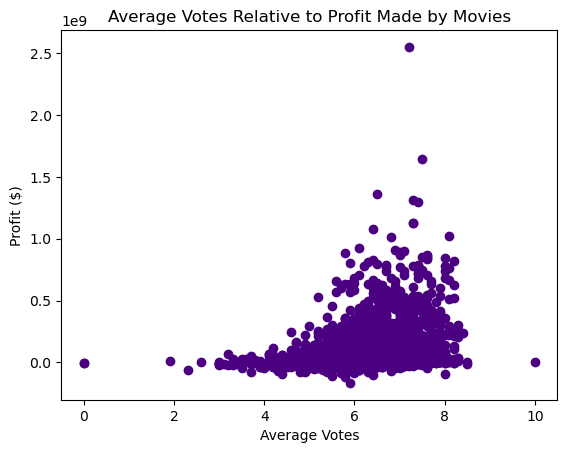

In [9]:
## making scatter plot
plt.scatter(movie_profit['vote_average'], movie_profit['profit'], c = 'indigo')
plt.xlabel("Average Votes")
plt.ylabel("Profit ($)")
plt.title("Average Votes Relative to Profit Made by Movies");

### Q8. The 'genres' column is unusual - it contains lists of dictionaries. We want to convert this into something more usuable.

[This code is from a Kaggle notebook. https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system ]

To do this, apply the function below to your `DataFrame`, e.g., if your `DataFrame` is called `df` then the code would be `df = genre_list(df)`. 

This will change the column to lists of genre types. While this question is really simple, there are some important guidelines to follow: 

* Do not run this more than once (unless you re-run from the top), as it operates in-place on the `DataFrame`. 

* If this code is not working for your `DataFrame`, it may be that you did not properly remove the ill-formatted rows in Q3. Revisit that question.

* For subseqeuent cells to run properly, the `DataFrame` you use for this exercise should have "reset" indices starting at 0.

In [10]:
### Functions to use for this exercise (do not modify!!!)

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        return names
    return [] #Return empty list in case of missing/malformed data

def genre_list(df):
    """ Change the 'genres' column in a movie dataframe to a list of genres
    Call function with df = genre_list(df)"""
    from ast import literal_eval
    df['genres'] = df['genres'].apply(literal_eval)    
    df['genres'] = df['genres'].apply(get_list)
    return df

In [11]:
## converting genres into genres column
movie_profit = genre_list(movie_profit)

### Q9. Make a list of the unique genre types. You will need to iterate through the lists in the 'genres' columns to make your list of the unique genre types. Print your list.


Consider using a nested loop, something like:

`for list1 in df2['genres']:` for the outer loop

and `for val in list1:` for the inner loop

In [12]:
## creating empty list
unique_genres = []
## colecting list of unique genres
for list in movie_profit['genres']:
    for val in list:
        if val not in unique_genres:
            unique_genres.append(val)

## printing unique genres
print(unique_genres)

['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime', 'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy', 'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music', 'Documentary', 'Foreign']


### Q10. Calculate the median profit for each genre type. Most movies have multiple genres, but that is ok (e.g., count Avatar for 'Action', 'Adventure', 'Fantasy', and 'Science Fiction'). Print the median profit of each genre type in units of millions of dollars (that is, divide by 1e6) and save these computed values in a list.

**Hint**: The cell below gives an example of how you can calculate the profit for all movies that contain the genre 'Action'. You will need to generalize this for all genres and compute the median values.

**Important Note**: this code assumes your DataFrame has indices that correspond to row numbers. To ensure this, make sure you reset the indices in Q3.

In [13]:
# Example calculation for Action movies

genre = 'Action' # pick Action genre, for example

# make an array to track rows with an action movie
gslice = np.zeros(len(movie_profit),dtype="bool") 

# iterate over rows, each one contains info about a movie
for ii, movie in movie_profit.iterrows(): 
    gslice[ii] = genre in movie['genres'] # check whether movie is of this genre, updating array
    
# print median profit of movies with this genre (in Millions)
mdp = movie_profit.loc[gslice,'profit'].median()/1e6
print("Median for profit for:", genre, mdp)

    
# display movies with this genre    
# movie_profit.loc[gslice,['genres','profit']].head() 

Median for profit for: Action 43.0209495


In [14]:
### Your task: apply to all genre types and store results in a list

## creating empty list of median profits to append to
median_profits = []

# make an array to track rows with a movie for the given genre
gslice = np.zeros(len(movie_profit),dtype="bool") 

# iterate over rows, each one contains info about a movie
for i in unique_genres:
    for ii, movie in movie_profit.iterrows():
        gslice[ii] = i in movie['genres'] # check whether movie is of this genre, updating array
    # print median profit of movies with this genre (in Millions)
    mdp = movie_profit.loc[gslice,'profit'].median()/1e6
    print("Median profit for:", i, mdp)
    median_profits.append(mdp)
    # display movies with this genre    
    movie_profit.loc[gslice,['genres','profit']].head()  


Median profit for: Action 43.0209495
Median profit for: Adventure 64.423521
Median profit for: Fantasy 61.340801
Median profit for: Science Fiction 34.945765
Median profit for: Crime 19.785914
Median profit for: Drama 13.801187
Median profit for: Thriller 24.492759
Median profit for: Animation 125.735876
Median profit for: Family 64.3204555
Median profit for: Western 5.0
Median profit for: Comedy 25.134824
Median profit for: Romance 18.778177
Median profit for: Horror 24.8411145
Median profit for: Mystery 25.2324605
Median profit for: History 19.942855
Median profit for: War 19.955685
Median profit for: Music 18.907422
Median profit for: Documentary 6.546368
Median profit for: Foreign -0.2449545


### Q11. Make a new `DataFrame` that has two columns: 'genre' (the list you created in Q9) and the median profit you calculated above. Sort by median profit, in millions of dollars, and display the entire `DataFrame`.

In [15]:
## making dictionary of unique genres and median profits
genre_medianprof_dict = {'genre': unique_genres, 'median_profit': median_profits}
## converting to dataframe
genre_medianprof_df = pd.DataFrame(data = genre_medianprof_dict)
genre_medianprof_df = genre_medianprof_df.sort_values(by=["median_profit"], ascending=False)

## printing dataframe
genre_medianprof_df

,genre,median_profit
7,Animation,125.735876
1,Adventure,64.423521
8,Family,64.320455
2,Fantasy,61.340801
0,Action,43.020950
3,Science Fiction,34.945765
13,Mystery,25.232460
10,Comedy,25.134824
12,Horror,24.841114
6,Thriller,24.492759


### To receive credit for this homework, upload both the .ipynb file and an .html version.